In [8]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

figure_folder = 'figures'
! mkdir $figure_folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

mkdir: cannot create directory `figures': File exists
2016-07-15 14:11:09	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-07-15 14:11:09	Parsing datapackage to create a Study object
2016-07-15 14:12:05 	Initializing Study
2016-07-15 14:12:05 	Initializing Predictor configuration manager for Study
2016-07-15 14:12:05	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-15 14:12:05	Added ExtraTreesClassifier to default predictors
2016-07-15 14:12:05	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-15 14:12:05	Added ExtraTreesRegressor to default predictors
2016-07-15 14:12:05	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-15 14:12:05	Added GradientBoostingClassifier to default predictors
2016-07-15 14:12:05	Predictor GradientB

In [9]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [10]:
alt_exons_bedfile = '/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/se_mxe_exon2.bed'

In [15]:
alt_exons_bedfile_intersect = alt_exons_bedfile.replace('.bed', '_merkin2012_ancient_alt_exons.bed')
# constitutive_bedfile_intersect = constitutive_bedfile.replace('.bed', '_merkin2012_ancient_alt_exons.bed')
print(alt_exons_bedfile_intersect)
# print constitutive_bedfile_intersect

/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/se_mxe_exon2_merkin2012_ancient_alt_exons.bed


In [16]:
! bedtools intersect \
    -b /projects/ps-yeolab/obotvinnik/merkin2012/merkin2012_rhemac_ancient_alt_exons_hg19.bed \
    -a $alt_exons_bedfile -s -f 0.9 \
    -wo > $alt_exons_bedfile_intersect

In [17]:
import pandas as pd

df = pd.read_table(alt_exons_bedfile_intersect, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr10,123972856,123972892,chr10:123969912:123971223:+@chr10:123972857:12...,1000,+,chr10,123972857,123972892,TACC2_ENSMMUG00000013033,1000,+,35
1,chr10,123989865,123989955,chr10:123988861:123989001:+@chr10:123989866:12...,1000,+,chr10,123989866,123990287,TACC2_ENSMMUG00000013033,1000,+,89
2,chr10,28884661,28884970,chr10:28879649:28879761:+@chr10:28884662:28884...,1000,+,chr10,28884662,28884970,WAC_ENSMMUG00000008268,1000,+,308
3,chr10,61813434,61813485,chr10:61815416:61815794:-@chr10:61813435:61813...,1000,-,chr10,61813434,61813484,ANK3_ENSMMUG00000003589,1000,-,50
4,chr10,61841907,61841934,chr10:61842373:61842495:-@chr10:61841908:61841...,1000,-,chr10,61841907,61841939,ANK3_ENSMMUG00000003589,1000,-,27


In [19]:
exon2_merkin2012_ancient = pd.Series(study.splicing.feature_data.index.isin(df[3]), index=study.splicing.feature_data.index)
print(exon2_merkin2012_ancient.shape)
exon2_merkin2012_ancient.head()

(37964,)


chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-    False
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-    False
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-    False
chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-    False
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-    False
dtype: bool

In [21]:
exon2_merkin2012_ancient.name = 'exon2_merkin2012_ancient'

In [23]:
modalities_merkin2012 = study.supplemental.modalities_tidy.join(exon2_merkin2012_ancient, on='event_id')
print(modalities_merkin2012.shape)
modalities_merkin2012.head()

(39659, 4)


,event_id,phenotype,modality,exon2_merkin2012_ancient
2,chr10:100190328:100190427:-@chr10:100189548:10...,iPSC,bimodal,False
5,chr10:100193697:100193848:-@chr10:100190888:10...,iPSC,uncategorized,False
8,chr10:100193740:100193848:-@chr10:100190888:10...,iPSC,uncategorized,False
11,chr10:100195392:100195529:-@chr10:100195029:10...,iPSC,uncategorized,False
13,chr10:101507014:101507147:+@chr10:101510126:10...,NPC,uncategorized,False


In [12]:
import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]

In [13]:
sns.set(context='paper', style='white')

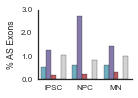

In [29]:
col = 'exon2_merkin2012_ancient'

fig, ax = plt.subplots(figsize=(2, 1.5))
sns.barplot(x='phenotype', y=col, hue='modality', hue_order=anchor.MODALITY_ORDER, 
            data=modalities_merkin2012, ci=None,
            palette=anchor.MODALITY_PALETTE, order=study.phenotype_order)
ax.locator_params('y', nbins=3)

yticks = ax.get_yticks()
yticklabels = 100 * yticks
ax.set(xlabel='', ylabel='% AS Exons', yticklabels=yticklabels)
ax.legend_.set_visible(False)
sns.despine()
fig.tight_layout()
fig.savefig('{}/{}.pdf'.format(figure_folder, col))